Team Members:

Group 16:


*   Pranay Kumar Murki - 002704749
*   Sakshi Agarkar - 002712319
*   Hari Priya Avarampalayam Manoharan - 002711275






In [2]:
#connecting to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import datetime as dt
import plotly.graph_objects as go


In [4]:
#reading data
df = pd.read_csv('/content/drive/MyDrive/Data Visualization/Merged_Covid_Vaccination.csv')
df.head()

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,Entity,vaccination_policy
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,Afghanistan,0.0
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,Afghanistan,0.0
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,Afghanistan,0.0
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,Afghanistan,0.0
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,Afghanistan,0.0


In [5]:
#Data Cleaning

#filling the missing values
df=df.fillna(0)

#dropping unnecessary columns
df=df.drop(["Unnamed: 0","Entity"],axis=1)

#list of float columns that has to be converted into integer datatype
int_cols=["total_cases",
"new_cases",
"total_deaths",
"new_deaths",
"icu_patients",
"hosp_patients",
"weekly_icu_admissions",
"weekly_hosp_admissions",
"total_tests",
"new_tests",
"total_vaccinations",
"people_vaccinated",
"people_fully_vaccinated",
"total_boosters",
"new_vaccinations",
"new_vaccinations_smoothed",
"new_vaccinations_smoothed_per_million",
"new_people_vaccinated_smoothed",
"vaccination_policy"
]
#converting the cols to int data type
for col in int_cols:
    df[col] = df[col].astype('int64')
df=df.drop_duplicates()


#remove continent 0
df=df.drop(df[df['continent']==0].index)

#remove country world
df=df.drop(df[df['continent']=='World'].index)

#converting dates to datetime format
df['dates']=pd.to_datetime(df['date']).dt.date

#fetching year
df['year']=pd.DatetimeIndex(df['dates']).year

#calculating GDP
df['gdp']=df['gdp_per_capita']*df['population']





In [6]:
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 222143 entries, 0 to 235426
Data columns (total 71 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    222143 non-null  object 
 1   continent                                   222143 non-null  object 
 2   location                                    222143 non-null  object 
 3   date                                        222143 non-null  object 
 4   total_cases                                 222143 non-null  int64  
 5   new_cases                                   222143 non-null  int64  
 6   new_cases_smoothed                          222143 non-null  float64
 7   total_deaths                                222143 non-null  int64  
 8   new_deaths                                  222143 non-null  int64  
 9   new_deaths_smoothed                         222143 non-null  float64
 

In [7]:
#dimensions
df.shape

(222143, 71)

In [8]:
#data overview
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,vaccination_policy,dates,year,gdp
0,AFG,Asia,Afghanistan,2020-02-24,5,5,0.0,0,0,0.0,...,0.511,41128772.0,0.0,0.0,0.0,0.0,0,2020-02-24,2020,7.419577e+10
1,AFG,Asia,Afghanistan,2020-02-25,5,0,0.0,0,0,0.0,...,0.511,41128772.0,0.0,0.0,0.0,0.0,0,2020-02-25,2020,7.419577e+10
2,AFG,Asia,Afghanistan,2020-02-26,5,0,0.0,0,0,0.0,...,0.511,41128772.0,0.0,0.0,0.0,0.0,0,2020-02-26,2020,7.419577e+10
3,AFG,Asia,Afghanistan,2020-02-27,5,0,0.0,0,0,0.0,...,0.511,41128772.0,0.0,0.0,0.0,0.0,0,2020-02-27,2020,7.419577e+10
4,AFG,Asia,Afghanistan,2020-02-28,5,0,0.0,0,0,0.0,...,0.511,41128772.0,0.0,0.0,0.0,0.0,0,2020-02-28,2020,7.419577e+10


# **LINE GRAPH**

Why line graph?
  
*   Line graphs are used to track changes over short and long periods of time.
*   When smaller changes exist, line graphs are better to use than bar graphs.
*   Line graphs can also be used to compare changes over the same period of time for more than one group









In [9]:
#subsetting the countries
subset_countries=['China','Canada','Germany','India','Italy','United Kingdom','United States','Russia']  
df_subset=df.loc[df['location'].isin(subset_countries)]
#line graph plotting
fig = px.line(df_subset, x="date", y="new_cases_smoothed", hover_name='location',title='Everyday total cases in each country', color='location',labels={'date':'Date','new_cases_smoothed':'Number of New Cases'})
fig.show()

**Analysis of the above graph:**


*   The graph shows us the variation of new covid cases on each day for different countries.
*   Maximum number of new cases was on Jan 15th 2022 in United States which is 805.8k.
*   India had it's maximum number of cases on May 8th 2021. In the year 2021 India had maximum number of covid cases.
*   From the above graph United states and India shows lots of variation.
*   Between Jan 2022 and April 2022, Russia,Germany,Italy and United Kingdom has more new cases.
*   Over the time line China is the only one country which doesn't show much variation and it maintains minimum number of cases.
*   Canada shows very little variable in Jan 2022




# **BAR GRAPH**

Why Bar Graphs?
*   Bar charts should be used when you are showing segments of information
*   Bar charts are useful to compare different categorical or discrete variables
*   Bar graphs are best when the changes are larger



In [10]:
#taking subset of countries
subset_countries=['Canada','Germany','India','Italy','United Kingdom','United States','Qatar','North korea','Japan','China','United Arab Emirates','Switzerland','Norway']
df_subset=df.loc[df['location'].isin(subset_countries)]

#calculationg the GDP per capita for every year
temp=df_subset.groupby(['location','year'])['gdp_per_capita'].sum().reset_index(name="gdp_per_capita_year")
temp=temp.sort_values('gdp_per_capita_year',ascending=True)

#plotting bar graph
fig=px.bar(temp, x="location", y='gdp_per_capita_year', title='Country vs GDP per capita for 2020-2022', color='year',hover_name='year',labels={'location':'Countries','gdp_per_capita_year':'GDP per Capita'})
fig.update_xaxes(tickangle=90)
fig.show()

**Analysis of the above graph:**
*   Between 2020-2022 India and China show low GDP per capita.
*   Qatar and UAE show highest per captia.



In [11]:
#taking subset of countries
subset_countries=['Canada','Germany','India','Italy','United Kingdom','United States','Qatar','North korea','Japan','China','United Arab Emirates','Switzerland','Norway']
df_subset=df.loc[df['location'].isin(subset_countries)]

#calculationg the GDP for every year
temp=df_subset.groupby(['location','year'])['gdp'].sum().reset_index(name="gdp_per_year")
temp=temp.sort_values('gdp_per_year',ascending=True)

#plotting bar graph
fig=px.bar(temp, x="location", y='gdp_per_year', title='Country vs GDP for 2020-2022',hover_name='year',color='year',labels={'location':'Countries','gdp_per_year':'GDP'})
fig.update_xaxes(tickangle=90)
fig.show()


**Analysis of the above graph:**
*   China, United Sates shows high GDP compared to other countries.
*   Qatar, Norway, Switzerland,UAE show very low GDP.



In [12]:
#geting vaccination status
temp=df_subset.groupby(['location','year'])['people_vaccinated'].sum().reset_index(name="total_vaccinated")

#plotting bar graph for vaccination sattus
fig = px.bar(temp, x='location', y='total_vaccinated', height=400,color='year',title='Total Vaccinated in each country',labels={'location':'Countries','total_vaccinated':'Total Vaccinated'})
fig.show()

**Analysis of the above graph:**

*   More people are vaccinated in India
*   Very less people got vaccinated in countries like Normay, Qatar, Switzerland, UAE.



In [13]:
#fetching death rate of cardio vascular patients
temp=df_subset.groupby(['location','year'])['cardiovasc_death_rate'].mean().reset_index(name="avg_cardiovasc_death_rate_per_year")

#plotting the bar graph
fig = px.bar(temp, x="location", y="avg_cardiovasc_death_rate_per_year", title='Death rate of cario vascular patients', color='year',labels={'location':'Countries','avg_cardiovasc_death_rate_per_year':'Average Cardio Vascular Death Rate'})
fig.show()


**Analysis of the above graph:**
*   Death rate with cardio vascular disease is high in India compared to other countries.




In [14]:

#defining the figure
fig = go.Figure()

#fetching the data
temp=df_subset.groupby(['location','year']).agg(avg_male_smokers=('male_smokers', 'mean'),avg_female_smokers=('female_smokers','mean')).reset_index()

#plotting bar graph comparison
fig.add_trace(go.Bar(
    x=temp['location'],#setting x 
    y=temp['avg_male_smokers'],#setting y
    name='Male Smokers',#legend name
    marker_color='indianred'#color of the bar
    
))
fig.add_trace(go.Bar(
    x=temp['location'],#setting x 
    y=temp['avg_female_smokers'],#setting y
    name='Female Smokers',#legend name
    marker_color='lightsalmon'#color of the bar
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45,title='No. of Male and Female Smokers in each country',xaxis_title='Country',yaxis_title='Count')
fig.show()

**Analysis of the above graph:**

*   Number of male smokers are high in all the countries 
*   India, China, UAE and Qatar has very less female smokers



ç

Why Tree Map:


*   To show comparison on higher dimension data.
*   Analysing higher dimension data is very easy with Tree Graph.
*   For example the below tree map shows year, location, number of deaths indicated by colors and number of new cases indicated by size of each box.






In [15]:
#tree map plots
px.treemap(df_subset,values='new_cases_smoothed', path=['location','year'], hover_name='location', color='new_deaths_smoothed_per_million',title='New total deaths, New cases in each country',labels={'location':'Countries','new_deaths_smoothed_per_million':'Number of Deaths','new_cases_smoothed': 'New Cases'})

**Analysis of the above graph:**

*   Number of death rate were high in Italy and Switzerland in the year 2020.
*   USA shows maximum deaths from 2020 to 2022.
*   Death rate was less in China, UAE, Qatar,Norway, Canada, Japan and Switzerland.
*   Number of new cases was very hign in USA, India, Germany, Italy, UK and Japan.
*   In 2020, Italy has less number of new cases but death rate is high.
*   In 2022, Japan has more number of cases but date rate is very less.








In [17]:
#tree map plots

px.treemap(df_subset,values='life_expectancy', path=['location','year'], hover_name='location', color='new_deaths_smoothed_per_million',title='New total deaths, New cases in each country',labels={'location':'Countries','new_deaths_smoothed_per_million':'Number of Deaths','new_cases_smoothed': 'New Cases'})

**Analysis of the above graph:**


*   Italy, Germany, USA and Russia has good life expectancy but the death rate in Italy, United States, Russia and UK is very high. This is because proportion of older people is higher in these countries.
*   China and India has less life expectancy but less death rate.



# **BUBBLE CHART**

Why Bubble Chart:
* Present relationship between three variables and show the changes in the trends.
* Show data in 3-dimension to widen the scope of the analysis.
* Provides a quick gist of the entire bubble chart contents making it easier to read.
* Represent a fourth variable by adding colors to the bubbles.

In [18]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['quarter'] = pd.PeriodIndex(df.date, freq='Q')
df["quarter"] = df["quarter"].map(str)
from plotly.offline import iplot
import plotly.express as px

fig = px.scatter(df, x="gdp_per_capita", y="life_expectancy", animation_frame="quarter", size="total_cases", 
                 color="continent", hover_name="quarter", log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90], 
                title="Covid Data", labels={"gdp_per_capita": "GDP Per Capita", "life_expectancy": "Life Expectancy"})

#fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# **Choropleth maps**

Why Choropleth maps:
* Choropleth maps use color to show how data changes from place to place. These maps allow us to visualize information tied to geography, and to compare and analyze data from across locations. 
* Choropleths help readers see stories in numbers: from taking data to tell a story about a student competition to looking at voter trends for insights into the political landscape.

In [19]:
import plotly.express as px
dataset=df.groupby(['continent','location'], as_index=False).agg({'total_cases':sum})
fig = px.choropleth(dataset[dataset["continent"].isin(["North America","Africa","Asia","South America","Oceania","Europe"])], locations='location', locationmode="country names",
                    color="total_cases",color_continuous_scale="teal")
fig.update_layout( title="Total Covid Cases",title_x=0.5)
fig.show()

# **Sunburn Chart**

Why sunburn chart:
* The sunburst chart is ideal for displaying hierarchical data. 
* Each level of the hierarchy is represented by one ring or circle with the innermost circle as the top of the hierarchy. 
* A sunburst chart without any hierarchical data (one level of categories), looks similar to a doughnut chart. 

In [20]:
fig = px.sunburst(
    df,
    path=['continent','location'],
    values='total_boosters',
)
fig.update_layout( title="Booster Doses",title_x=0.5)
fig.show()

# **Pie Chart**

Why Pie Chart:
* It visually portrays data as a fraction of a whole, which can be an important communication tool for even the most inexperienced audience.
* It allows the viewer to see a data comparison at a glimpse, allowing them to do an immediate analysis or quickly comprehend details.
* The use of this chart eliminates the need for readers to examine or quantify underlying numbers.

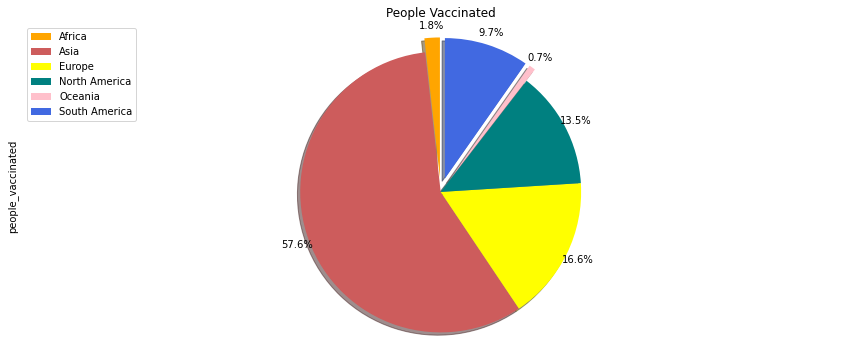

In [21]:
# have some modifications
import matplotlib.pyplot as plt
df_continents = df.groupby('continent', axis=0).sum()
df_continents.head()

colors_list=['orange','indianred','yellow','teal','pink','royalblue']
explode_list=[0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each slice

# plot pie chart
df_continents['people_vaccinated'].plot(kind='pie',
                            figsize=(15,6),
                            autopct='%1.1f%%', # add percentages
                            startangle=90, # start angle 90 (Africa)
                            shadow=True, 
                            labels=None,
                            pctdistance=1.09, # the ration between the center of each pie slice and percentage locations
                            colors=colors_list,
                            explode=explode_list, # 'explode' lowest three continents
                            )
plt.title('People Vaccinated')
plt.axis('equal') # sets the pie chart to look like a circle

plt.legend(labels=df_continents.index, loc='upper left')

plt.show()